# Housing Prices: Advanced Regression Analysis

In [ ]:
#The project is about USA housing price prediction using regression

# Import necessary libraries

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [21]:
house_data_train=pd.read_csv('train.csv')  #load the data

In [22]:
house_data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [23]:
house_data_train.shape

(1460, 81)

In [24]:
house_data_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [25]:
house_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [26]:
house_data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [27]:
house_data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [28]:
house_data_train.describe(include='object').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [29]:
#print the unique values in decrfeasing order
print(house_data_train.nunique().sort_values(ascending=False))

Id            1460
LotArea       1073
GrLivArea      861
BsmtUnfSF      780
1stFlrSF       753
              ... 
HalfBath         3
Street           2
CentralAir       2
Utilities        2
Alley            2
Length: 81, dtype: int64


In [30]:
# Drop duplicates
'''Drop Duplicates it improves data quality'''
df = house_data_train.drop_duplicates()
print( df.shape )
# no duplicates in datasets

(1460, 81)


# 2. EXPLORATORY DATA ANALYSIS -with data analysis

Using EDA :Visualize fesatures, insight /observation from the data
. Missing Values
. All The Numerical Variables
. Distribution of the Numerical Variables
. Categorical Variables
. Cardinality of Categorical Variables
. Outliers

In [31]:
# Seperate numerical & categorical columns
cat_cols=house_data_train.select_dtypes(include=['object']).columns # categorical columns
num_cols = house_data_train.select_dtypes(include=np.number).columns.tolist() # numerical columns
print("Categorical Variables:", len(cat_cols))
print(cat_cols)
print("numerical Variables:", len(num_cols))
print(num_cols)

Categorical Variables: 43
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
numerical Variables: 38
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 

# Check the distribution of target column -

-log transformation due to right positive skewness:
-It should be normal distribution

In [32]:
# check the distrubution of target varible i.e SalePrcie
house_data_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\G3NZ\AppData\Local\Temp\ipykernel_16172\3715729973.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  bar = sns.distplot(house_data_train["SalePrice"],kde=True)


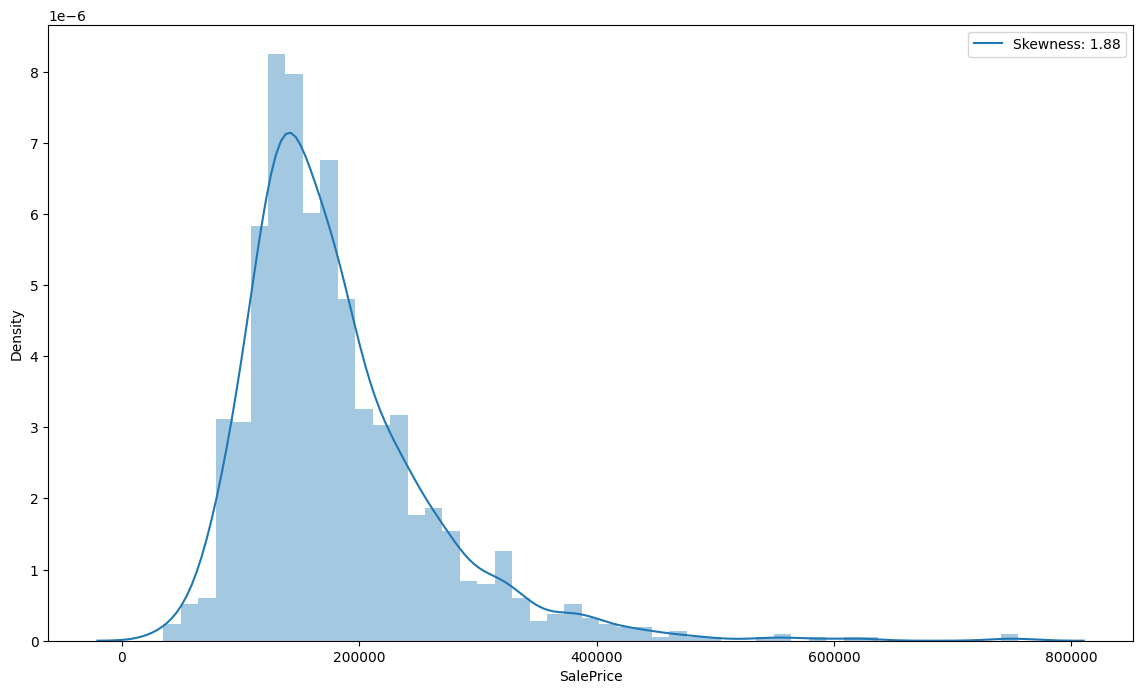

In [33]:
# Plot the distplot of target
plt.figure(figsize=(14,8))
bar = sns.distplot(house_data_train["SalePrice"],kde=True)
bar.legend(["Skewness: {:.2f}".format(house_data_train['SalePrice'].skew())])
plt.show()

# here sales price normaly distrubeted with right skewness

# log transformation on sale price -right skewness

In [34]:
#check skewness
#from above histogram it is visible that our target variable is right skewed
house_data_train['SalePrice'].skew()

1.8828757597682129

In [35]:
''''Normalization in regression helps stabilize predictions, improves model convergence,
and ensures features with differentscales contribute equally, facilitating better model 
training and interpretation.'''

log_transformed_target = np.log1p(house_data_train['SalePrice'])

# Update the original DataFrame with the transformed column
house_data_train['SalePrice']= log_transformed_target

# Display the updated DataFrame
print(house_data_train['SalePrice'].describe())

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64


C:\Users\G3NZ\AppData\Local\Temp\ipykernel_16172\3715729973.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  bar = sns.distplot(house_data_train["SalePrice"],kde=True)


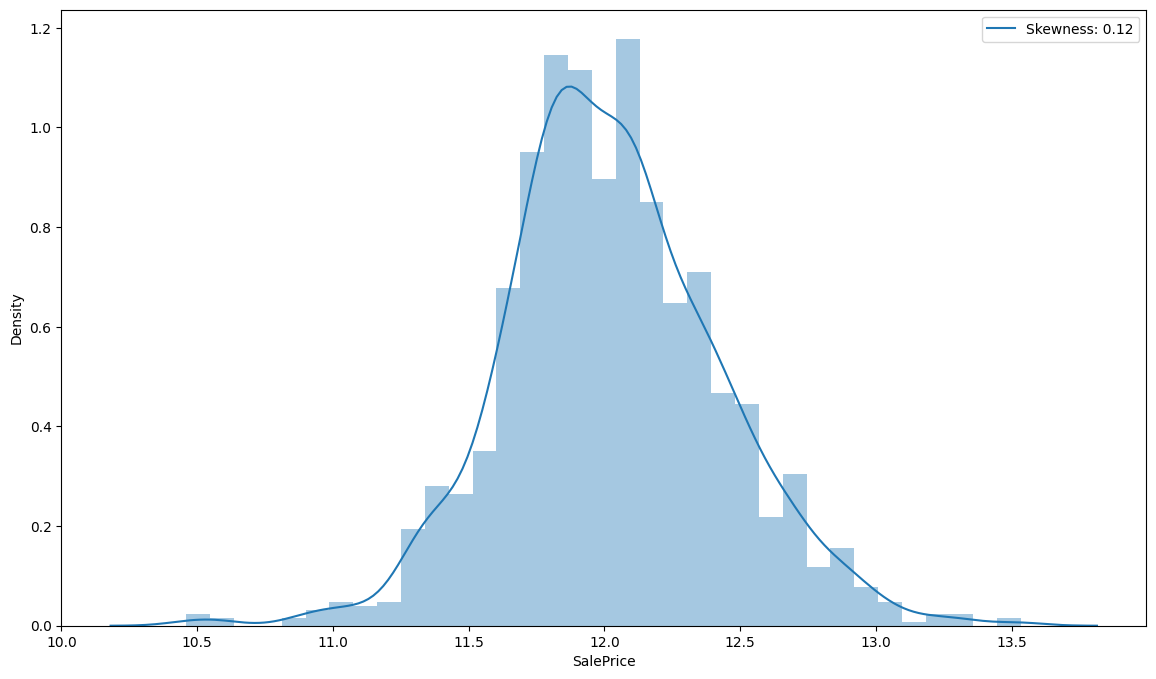

In [36]:
# Plot the distplot of target
plt.figure(figsize=(14,8))
bar = sns.distplot(house_data_train["SalePrice"],kde=True)
bar.legend(["Skewness: {:.2f}".format(house_data_train['SalePrice'].skew())])
plt.show()

In [37]:
#check the skewness
house_data_train['SalePrice'].skew()

0.12134661989685333

# DATA PREPROCESSING

In [38]:
house_data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


In [39]:
#check missing values and handle with best possible solutions 
#sum of missing data in columns wise
house_data_train.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [40]:
# Get the percentages of null values of each column
'''house_data_train.isnull().sum()---->count the null values in each column
df.shape[0]-------------> count the number of row9means total row)'''
null_percent = (house_data_train.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
null_percent

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
MasVnrType     59.726027
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64

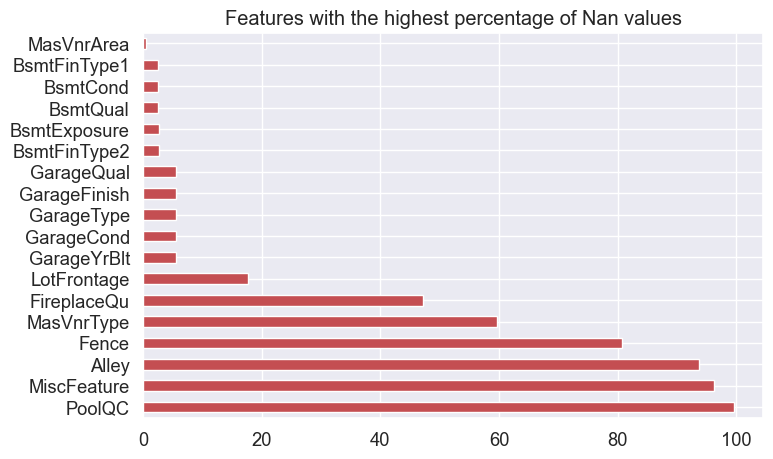

In [41]:
# Shows null values bar graph
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.2)
null_percent[null_percent > 0.1].plot(kind = "barh",color='r') # horizontal bar
plt.title("Features with the highest percentage of Nan values")
plt.show()

In [42]:
# Set a threshold (e.g., 40%)
threshold = 40

# select the column for droping whose null percentage greater than threshold
columns_to_drop = null_percent[null_percent > threshold].index
columns_to_drop=columns_to_drop.tolist()
# drop the column selected by threshold
house_data_train.drop(columns_to_drop,axis=1,inplace=True)

# Display the DataFrame after dropping columns
house_data_train.shape

(1460, 75)

In [43]:
# Seperate numerical & categorical columns
cat_cols=house_data_train.select_dtypes(include=['object']).columns # categorical columns
num_cols = house_data_train.select_dtypes(include=np.number).columns.tolist() # numerical columns
print("Categorical Variables:", len(cat_cols))
print(cat_cols)
print("numerical Variables:", len(num_cols))
print(num_cols)       #five column drop has most frequent null value

Categorical Variables: 37
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')
numerical Variables: 38
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'G

In [45]:
null_percent1 = (house_data_train.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
null_percent1

LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
                  ...    
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
MSSubClass       0.000000
HeatingQC        0.000000
SalePrice        0.000000
Length: 75, dtype: float64

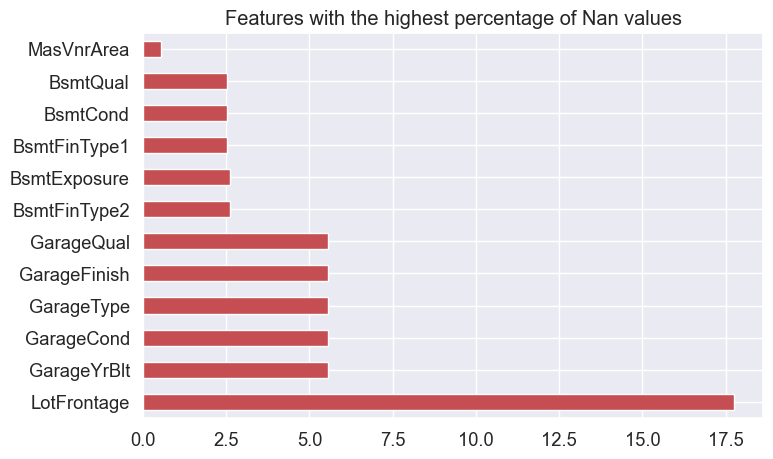

In [47]:

plt.figure(figsize=(8, 5))
sns.set(font_scale=1.2)
null_percent1[null_percent1 > 0.1].plot(kind = "barh",color='r') # horizontal bar
plt.title("Features with the highest percentage of Nan values")
plt.show()

Having look on numerical data and try to find out best method to fill out the missing numerical values


                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

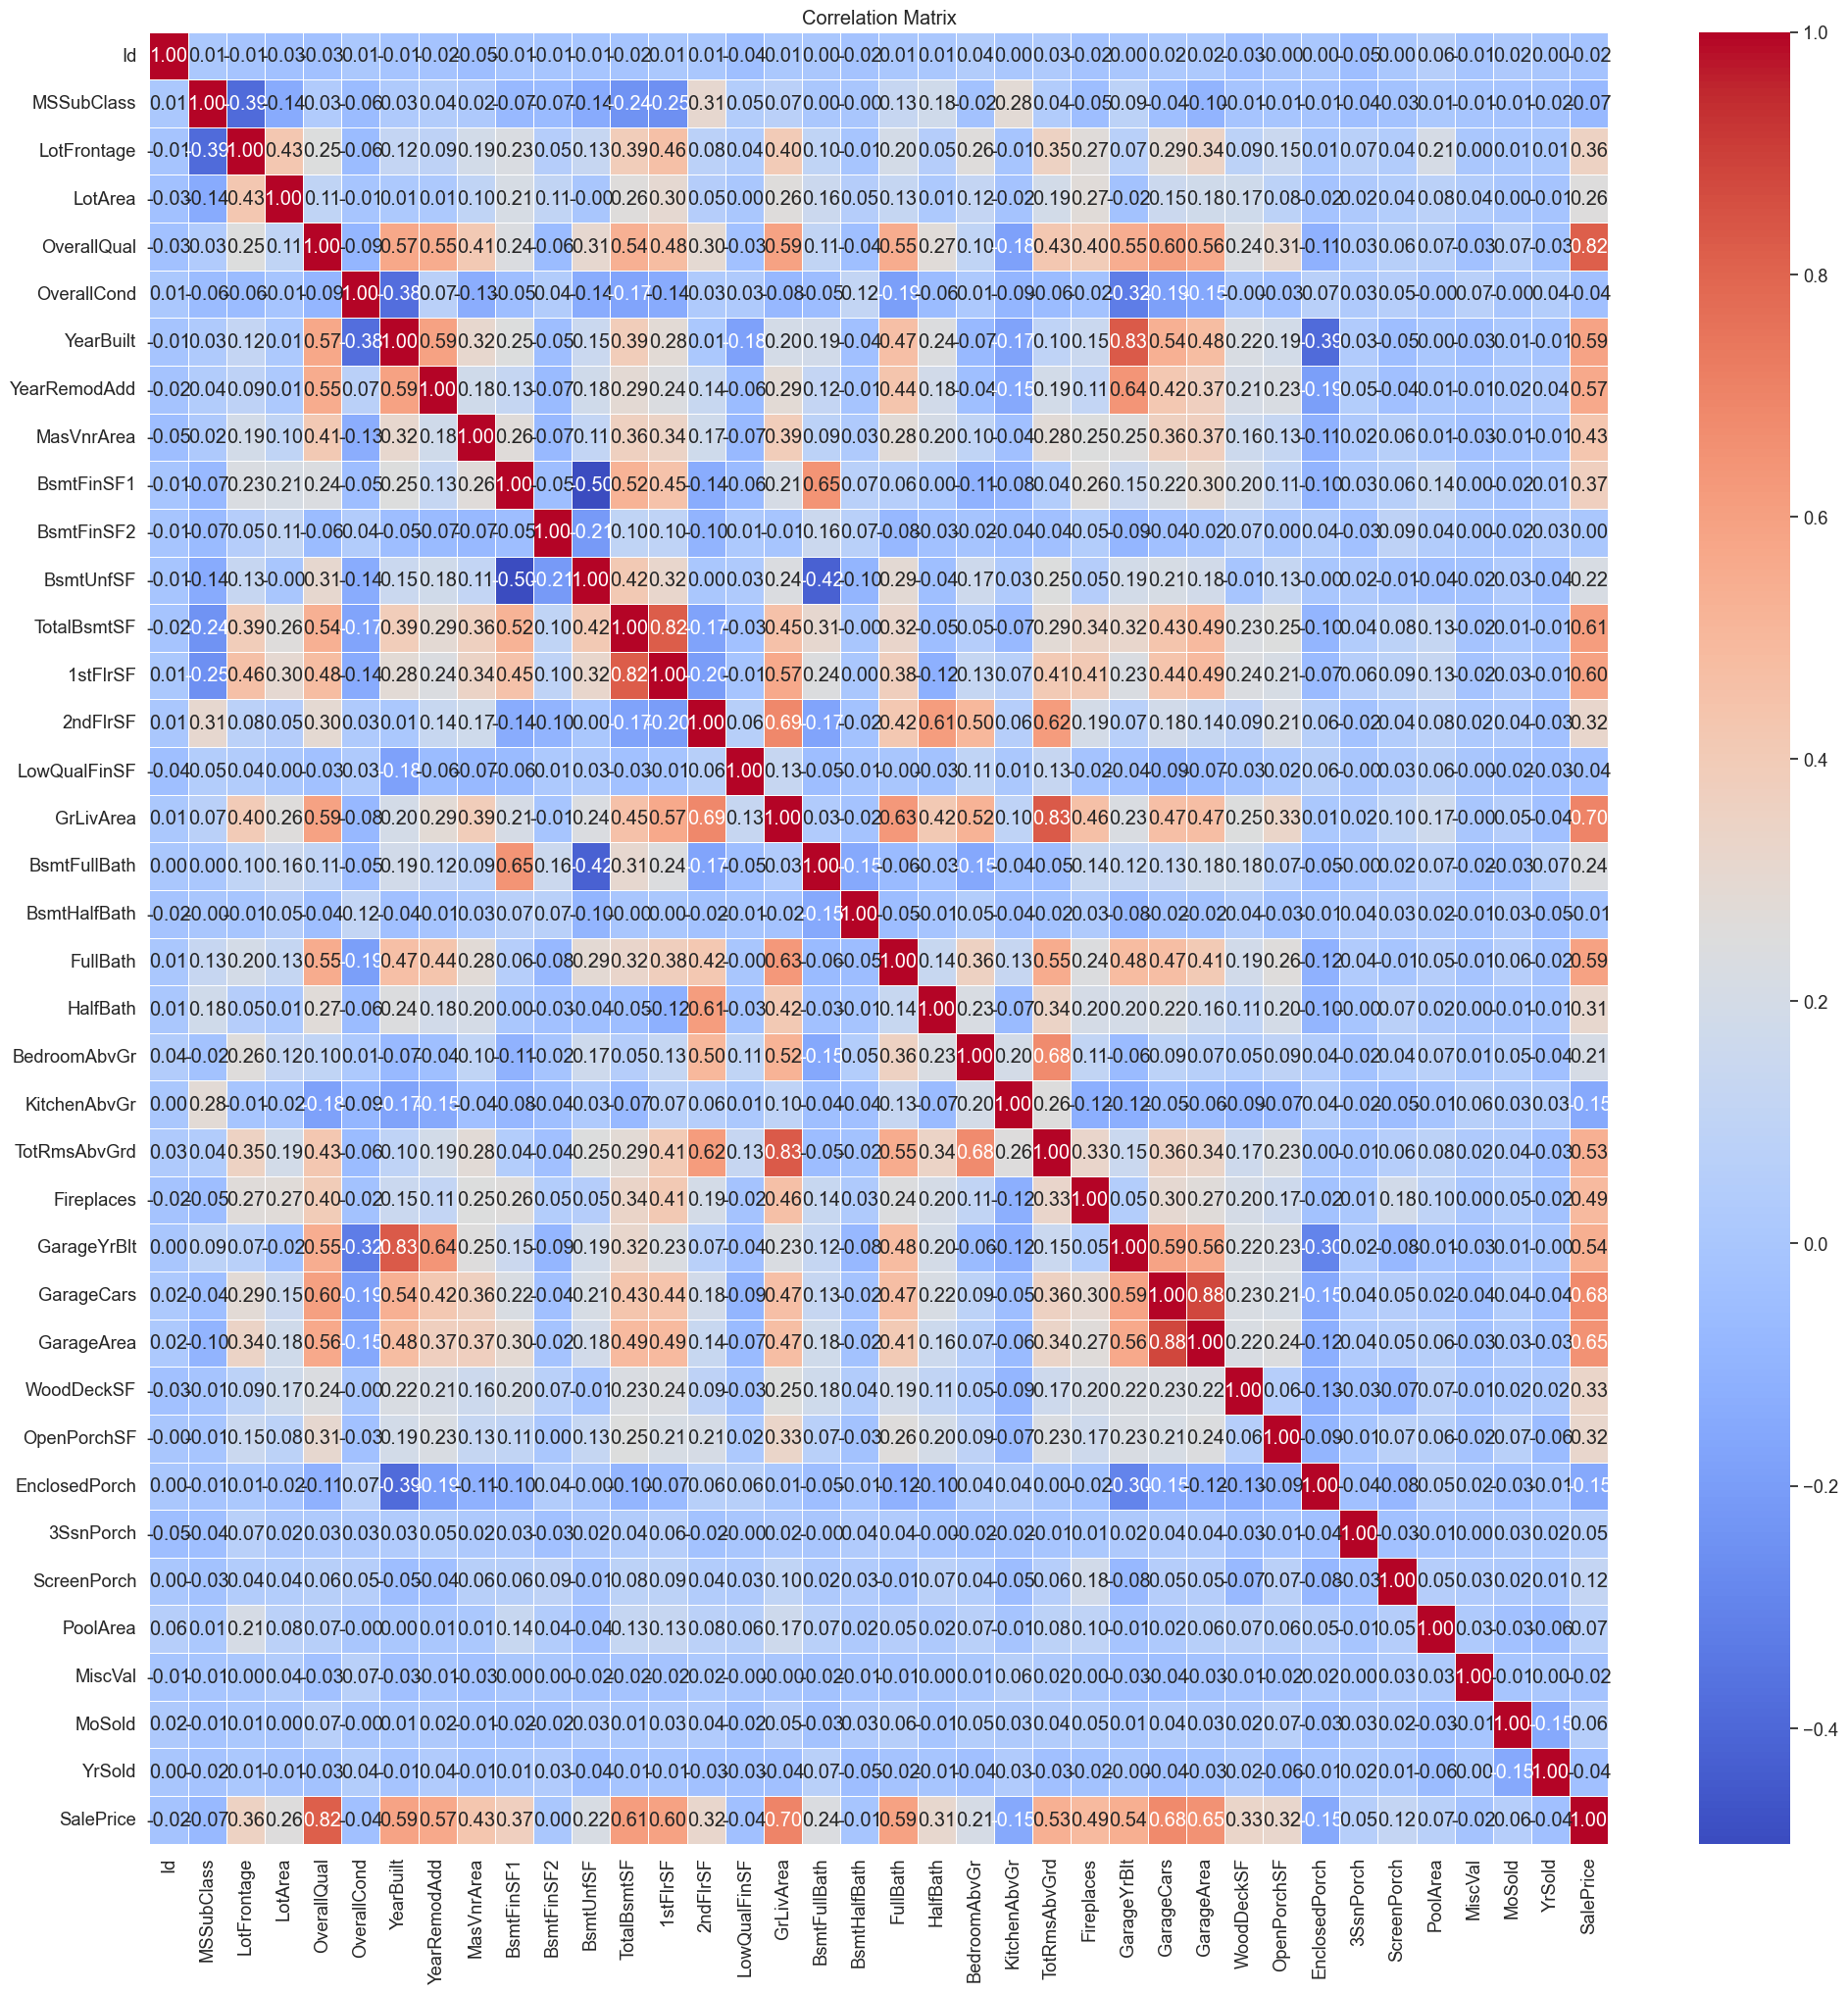

In [50]:
# Select only numeric columns
numeric_df = house_data_train.select_dtypes(include=['float64', 'int64'])

# Compute the Pearson correlation matrix for the numeric columns
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(24, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [51]:
missing_values = house_data_train.isnull().sum()

# Display columns with their respective counts of missing values
missing_values_summary = missing_values[missing_values > 0]
missing_values_summary

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

Filling numerical values


'LotFrontage', 'MasVnrArea' fill these values with mean 

'GarageYrBlt' highly corelated with YearBuilt  --> Filling it with KNN Imputer 


In [55]:
#Fill missing values for 'LotFrontage' and 'MasVnrArea' using mean
house_data_train['LotFrontage'].fillna(house_data_train['LotFrontage'].mean(), inplace=True)
house_data_train['MasVnrArea'].fillna(house_data_train['MasVnrArea'].mean(), inplace=True)

C:\Users\G3NZ\AppData\Local\Temp\ipykernel_16172\535945532.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_data_train['LotFrontage'].fillna(house_data_train['LotFrontage'].mean(), inplace=True)
C:\Users\G3NZ\AppData\Local\Temp\ipykernel_16172\535945532.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [56]:
from sklearn.impute import KNNImputer

# KNN Imputation for 'GarageYrBlt' based on its correlation with 'YearBuilt'
# Select the columns relevant for KNN Imputation
knn_columns = ['GarageYrBlt', 'YearBuilt']

# Extract the relevant data
knn_data = house_data_train[knn_columns]

# Initialize the KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Perform KNN Imputation
knn_imputed_data = knn_imputer.fit_transform(knn_data)

# Assign the imputed data back to the original DataFrame
house_data_train['GarageYrBlt'] = knn_imputed_data[:, 0]

In [57]:
# Check for remaining missing values (if any)
print(house_data_train[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().sum())

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64


In [25]:
'''remaining colmns have missing values can be replace with mean in numerical col
and mode for categorical values'''
for index in num_cols:
    house_data_train[index].fillna(house_data_train[index].mean(),inplace=True)
    
for index in cat_cols:
    house_data_train[index].fillna(house_data_train[index].mode().values[0],inplace=True)

In [26]:
#check missing values and handle with possible tecniqus
#sum of missing data in columns wise
house_data_train.isnull().sum().sort_values(ascending=False)

Id              0
FullBath        0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
               ..
MasVnrType      0
Exterior2nd     0
Exterior1st     0
RoofMatl        0
SalePrice       0
Length: 76, dtype: int64

In [27]:
# convert the all numerical column into same data type int 64# LotFrontage MasVnrArea  GarageYrBlt
house_data_train['LotFrontage']=house_data_train['LotFrontage'].astype(np.int64)
house_data_train['MasVnrArea']=house_data_train['MasVnrArea'].astype(np.int64)
house_data_train['GarageYrBlt']=house_data_train['GarageYrBlt'].astype(np.int64)

house_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [28]:
def replace_outliers_with_mean(dataframe, columns, iqr_multiplier=1.5):
    df = dataframe.copy()

    for column_name in columns:
        # Calculate the first and third quartiles (Q1 and Q3)
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + iqr_multiplier * IQR
        lower_bound = Q1 - iqr_multiplier * IQR
        df[column_name] = df[column_name].apply(lambda x: df[column_name].mean() if x > upper_bound or x < lower_bound else x)

    return df

In [29]:
#detect the outlier
house_data_train=replace_outliers_with_mean(house_data_train,num_cols,1.5)

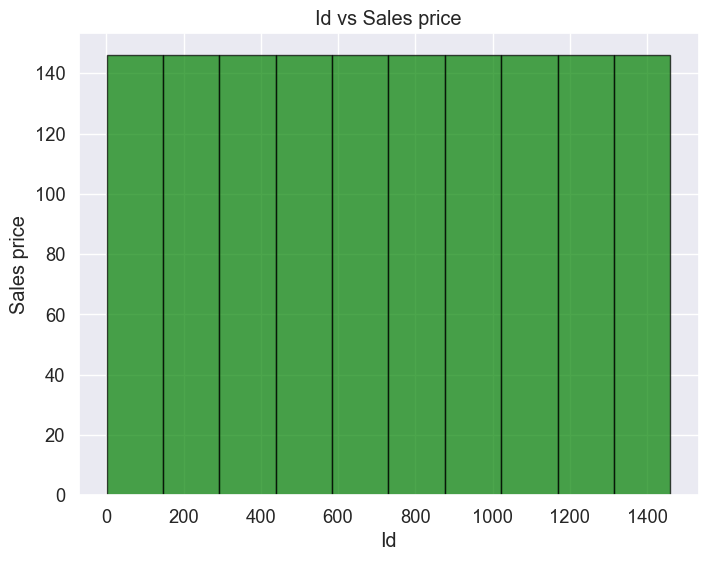

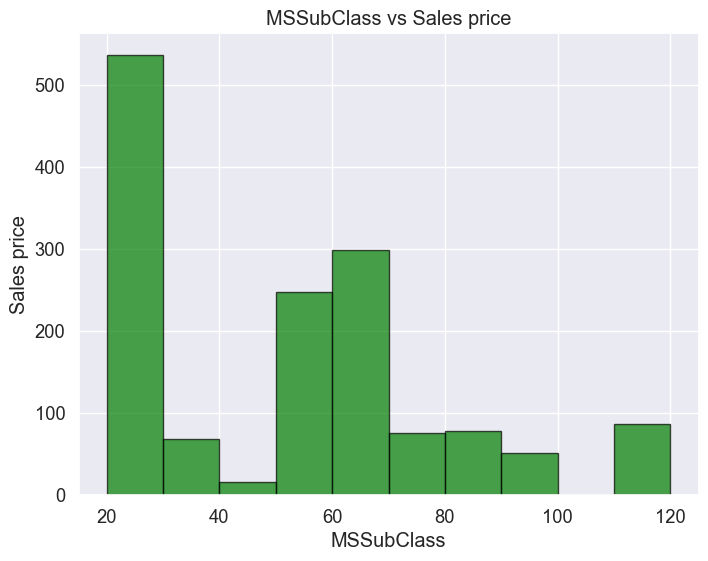

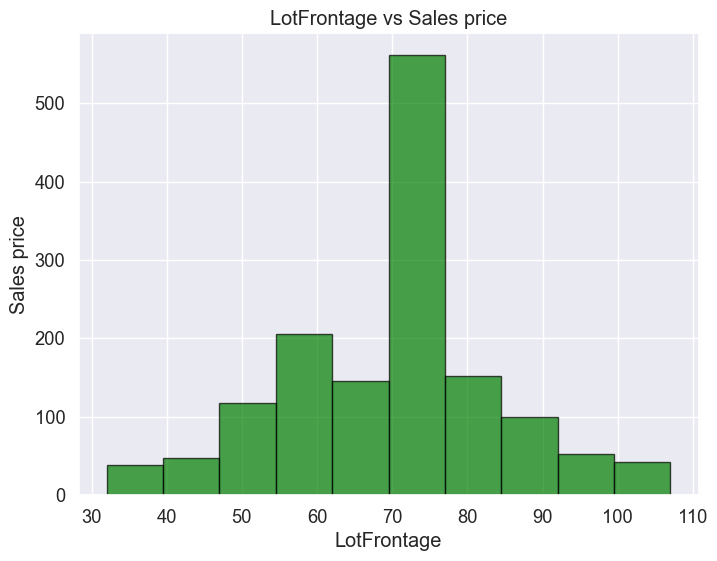

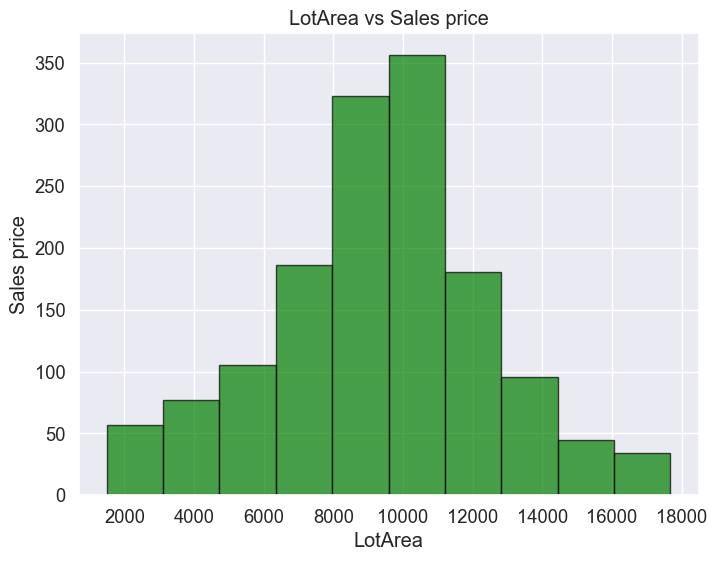

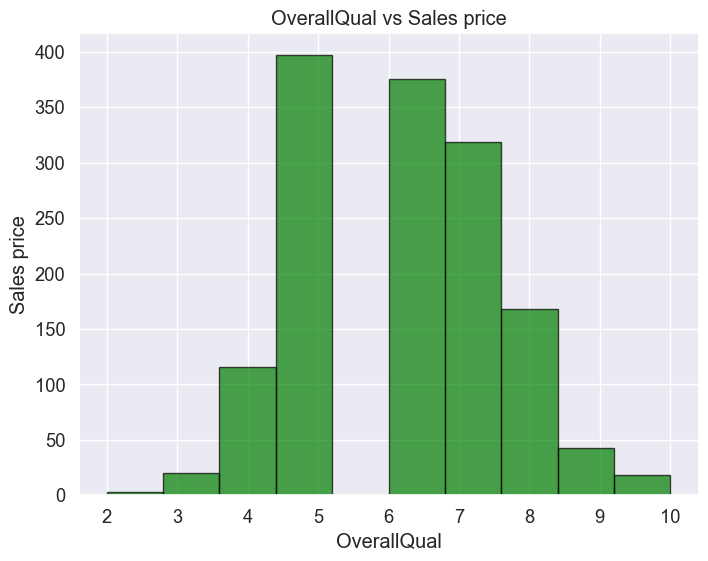

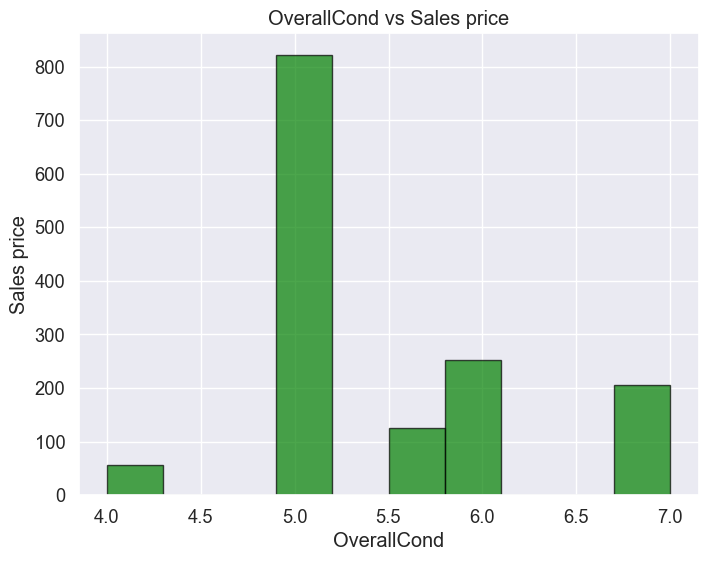

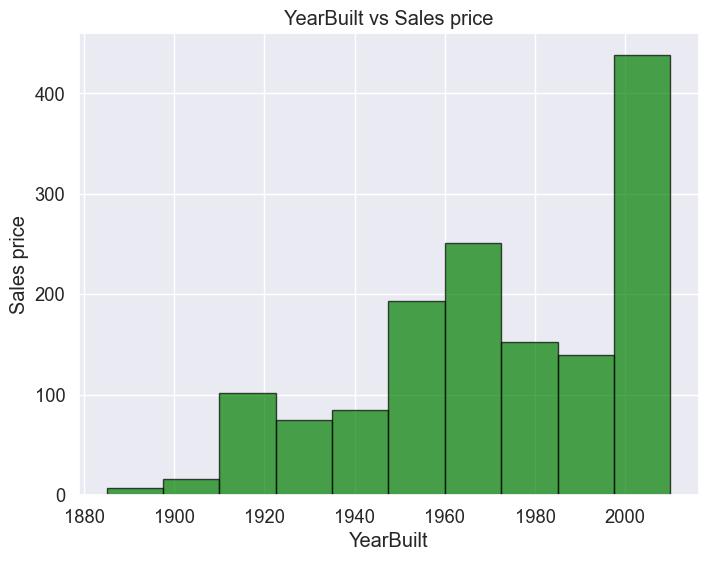

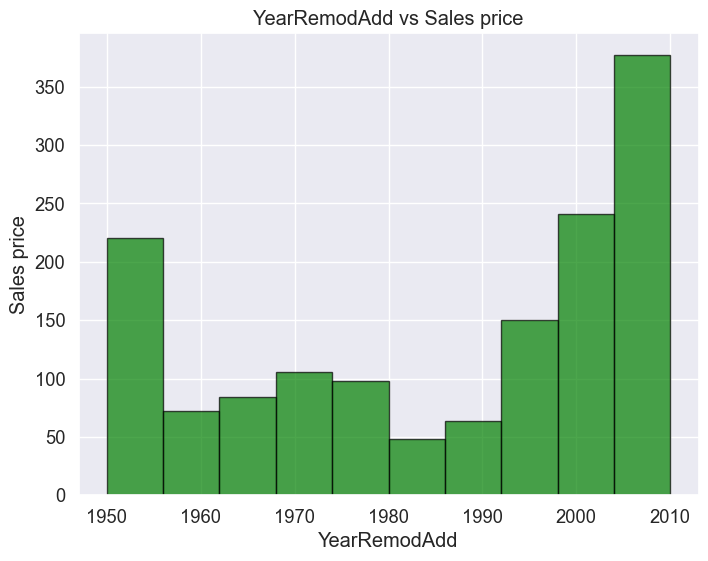

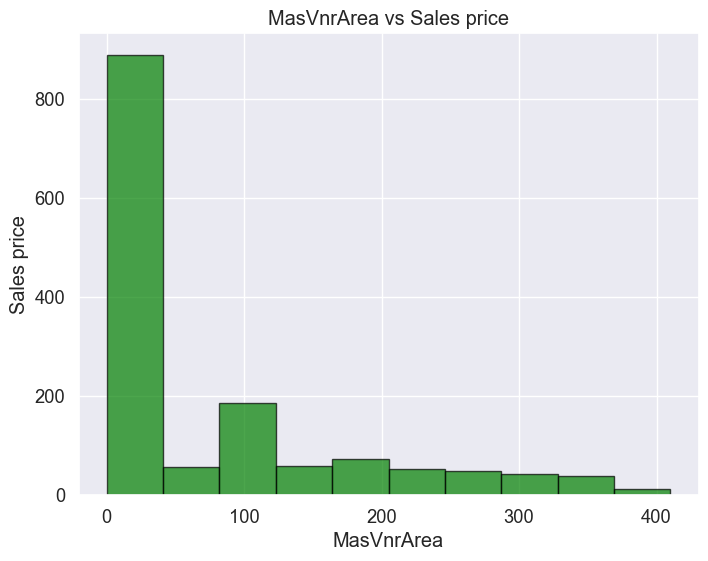

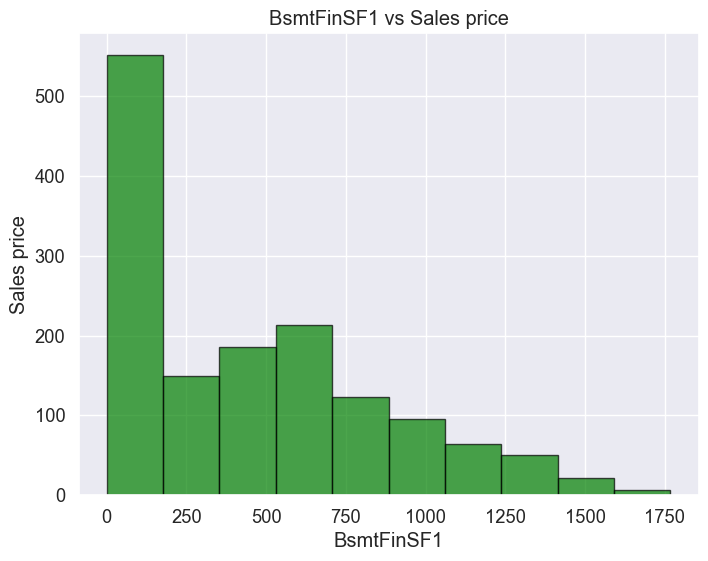

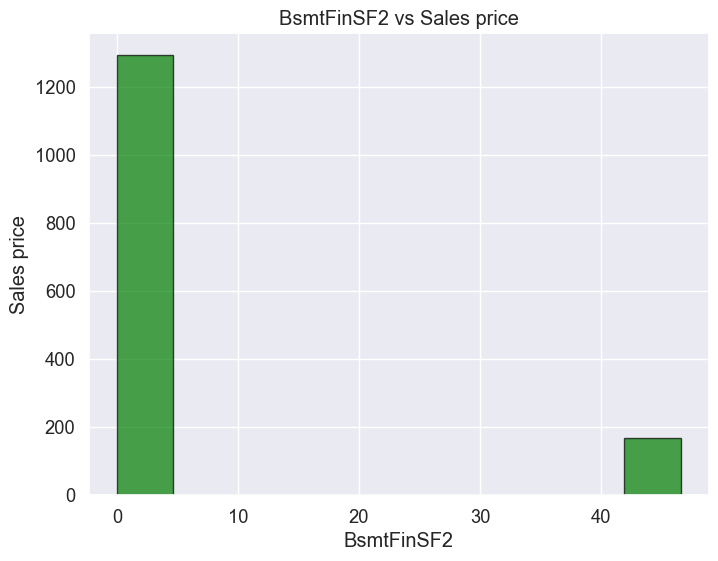

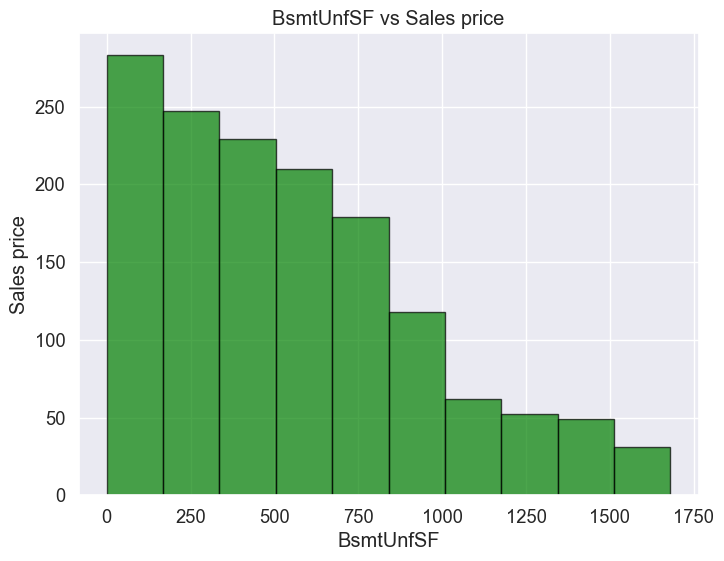

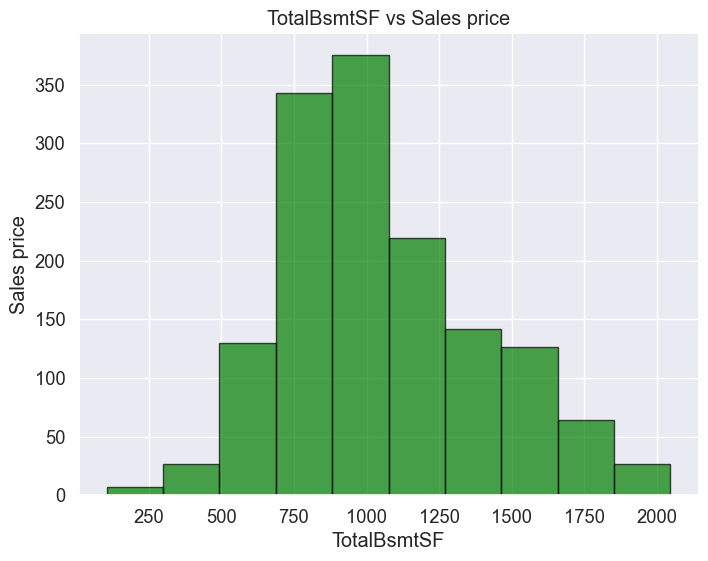

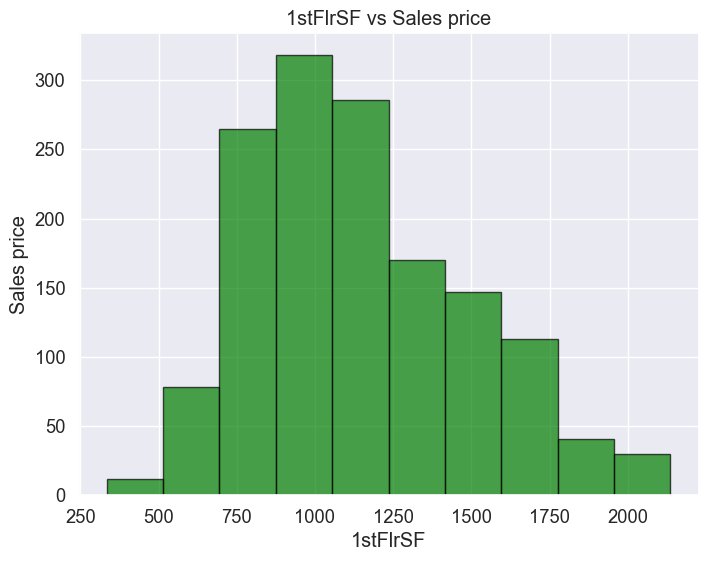

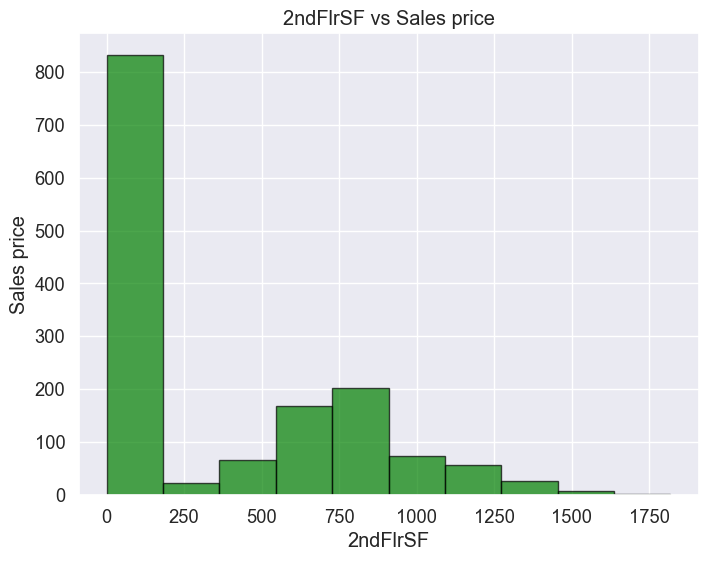

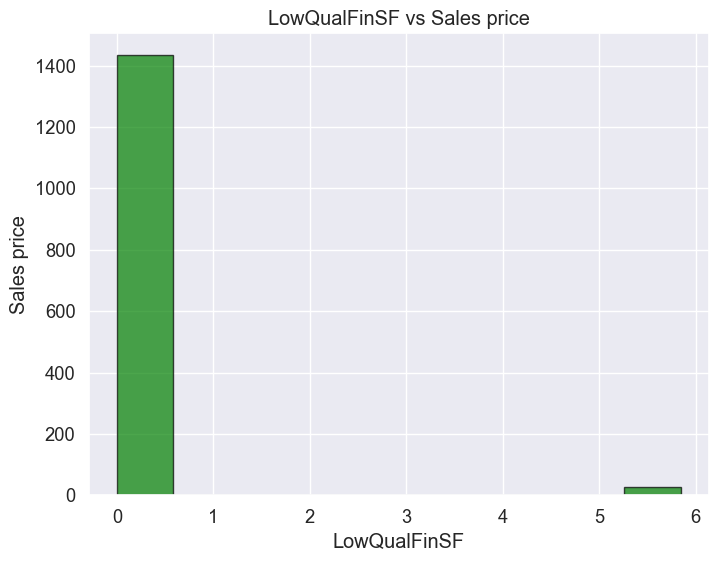

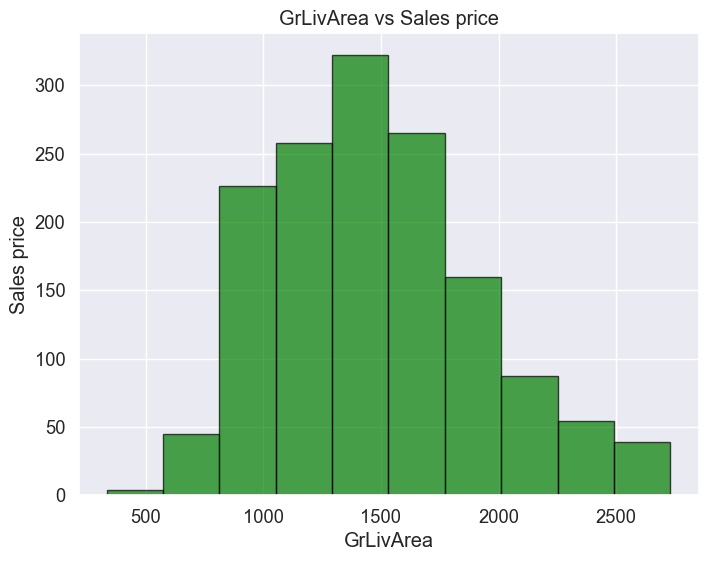

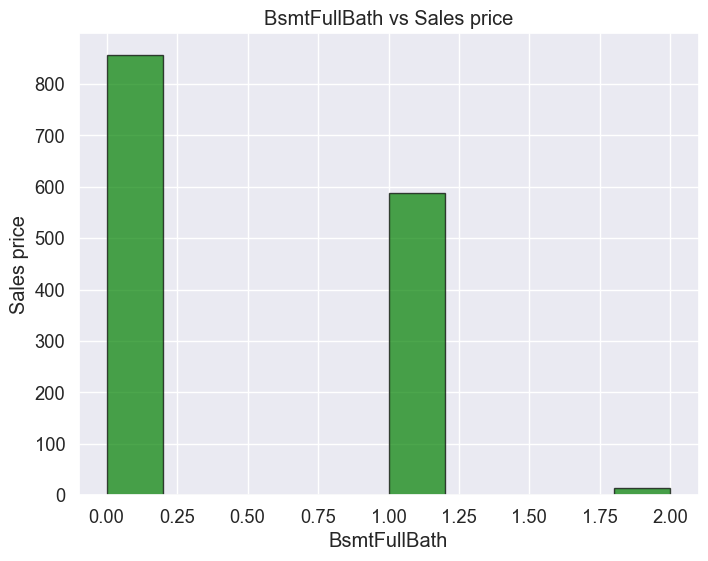

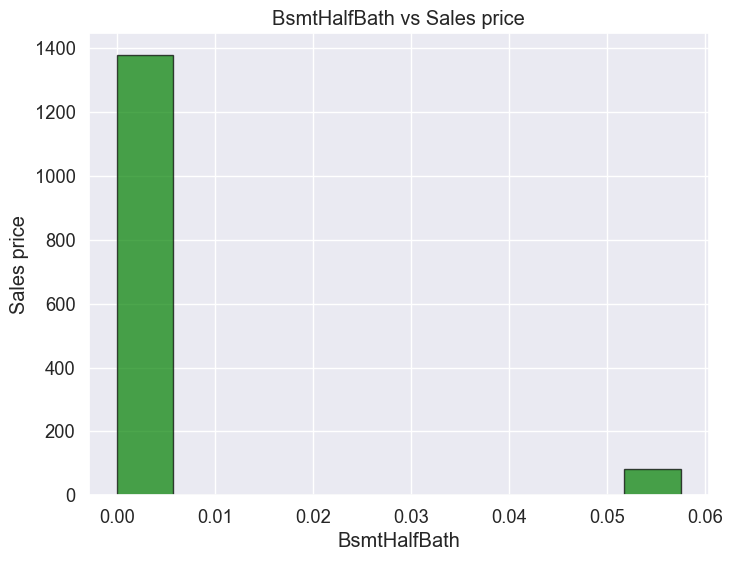

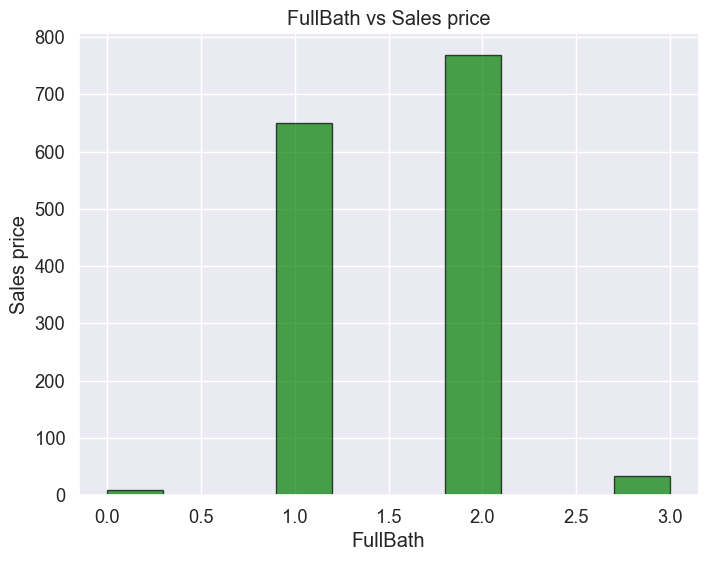

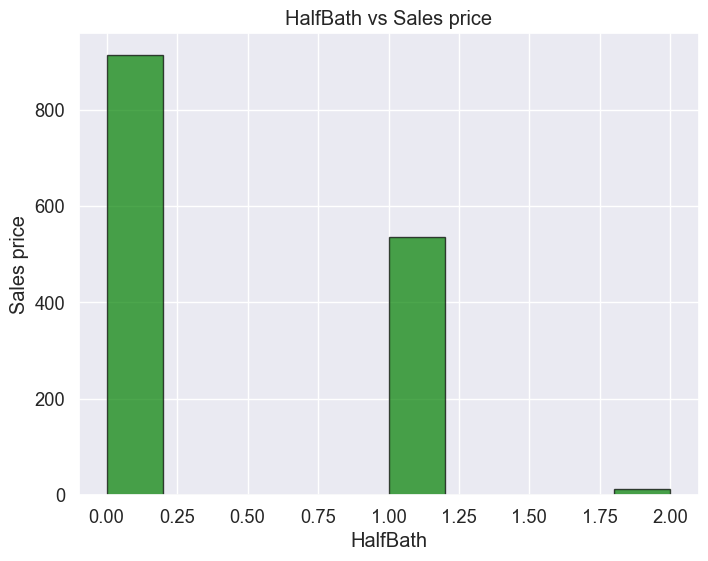

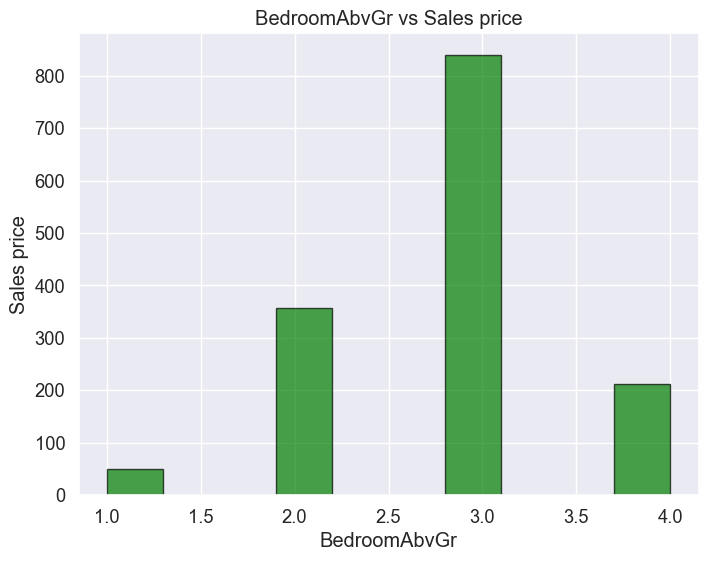

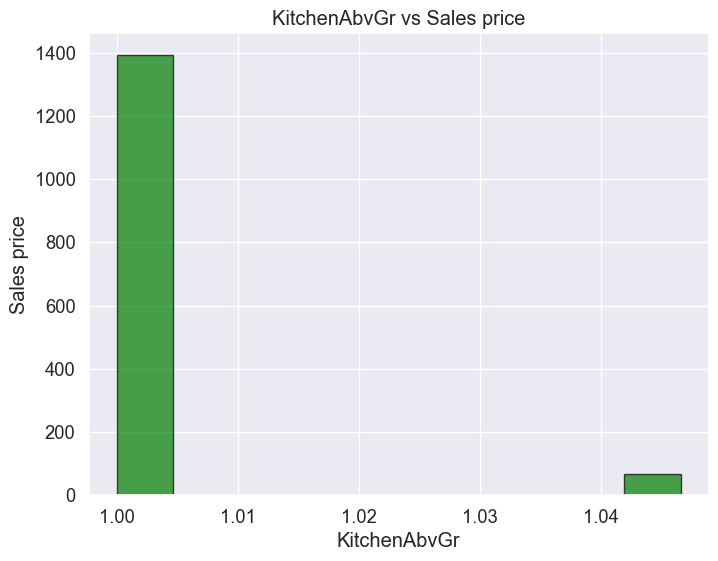

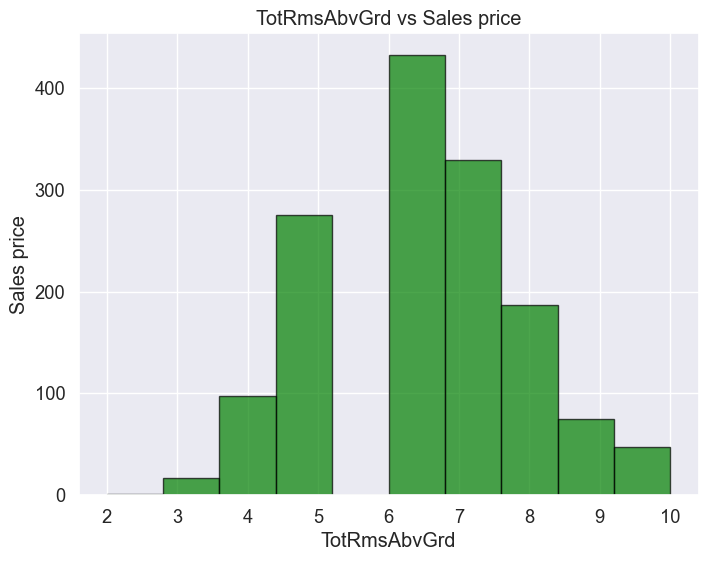

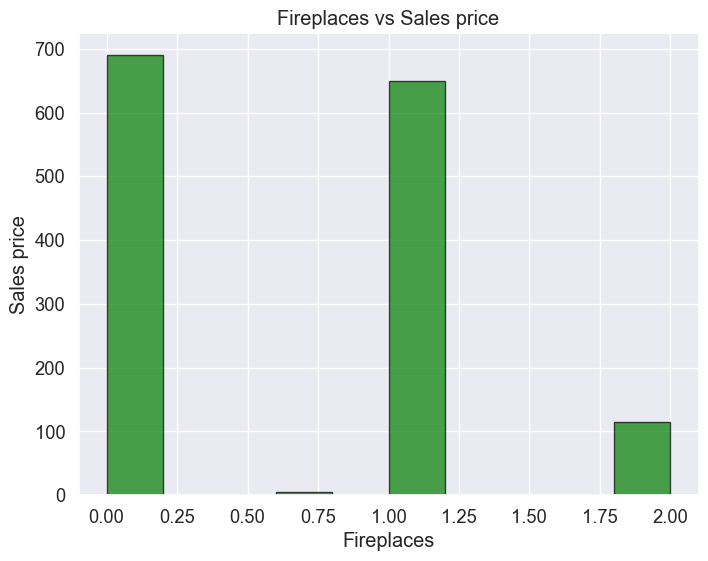

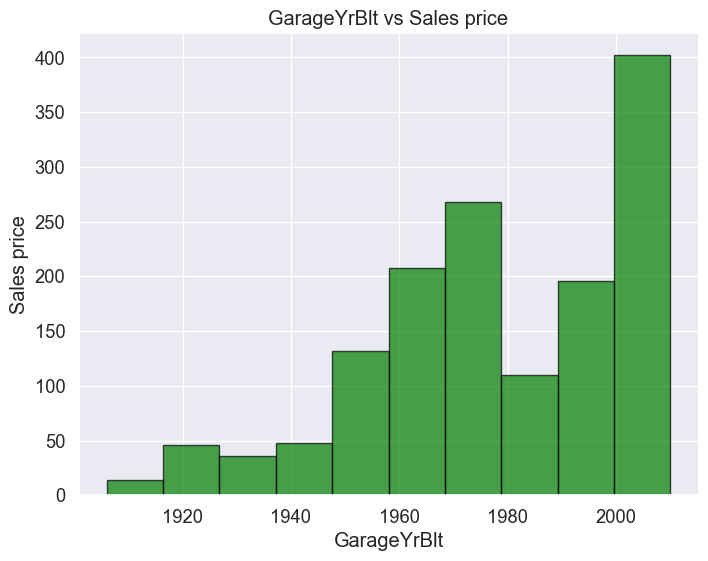

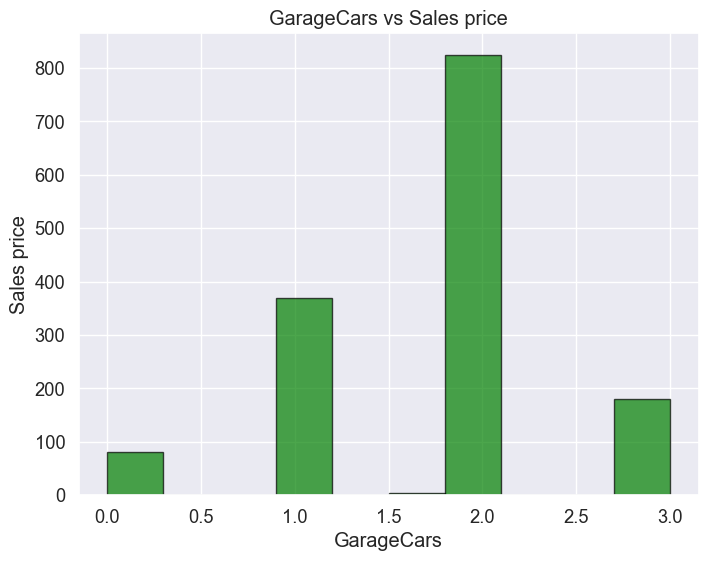

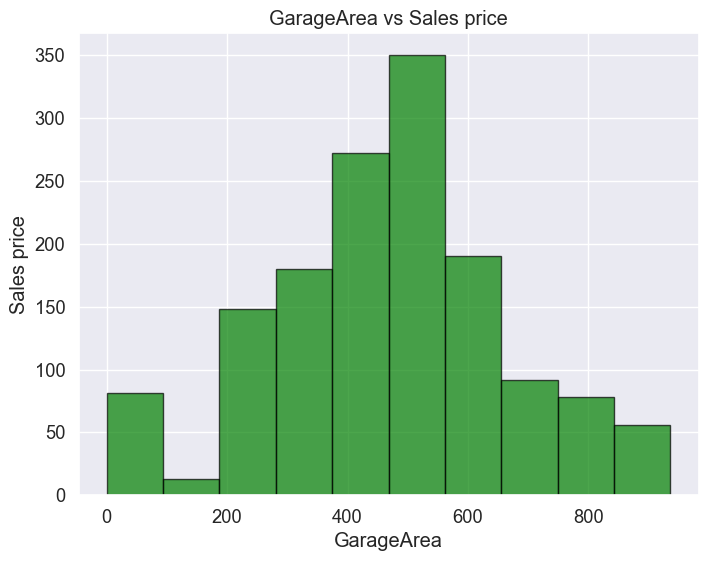

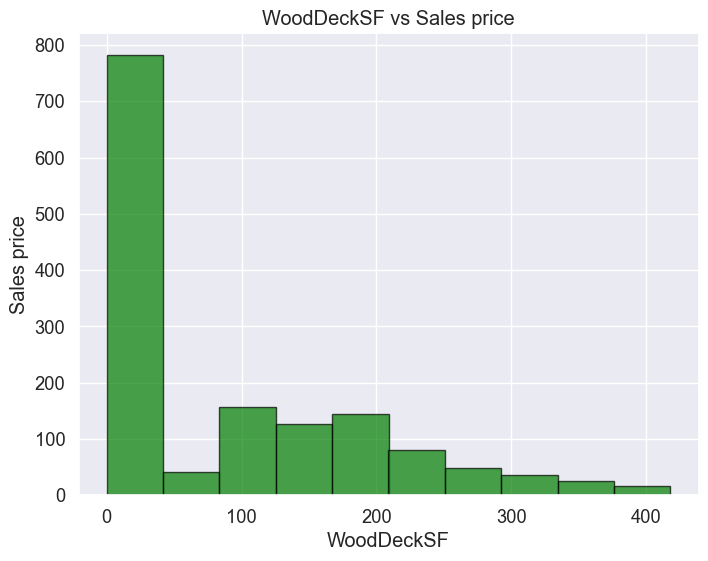

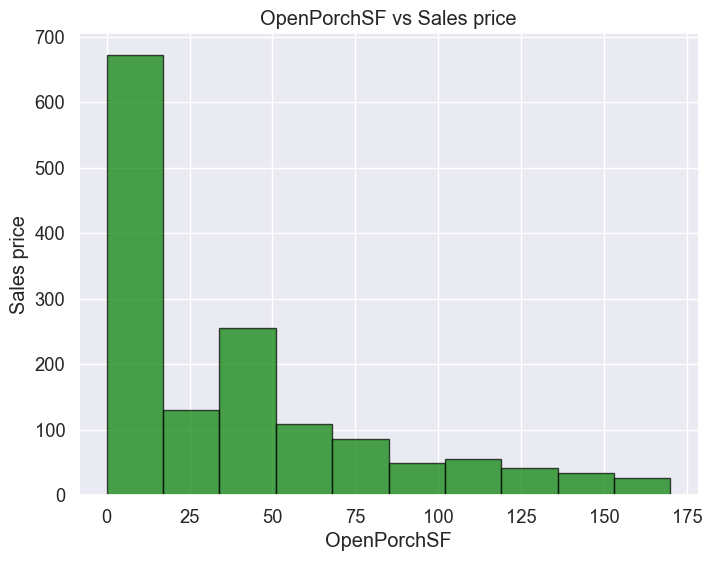

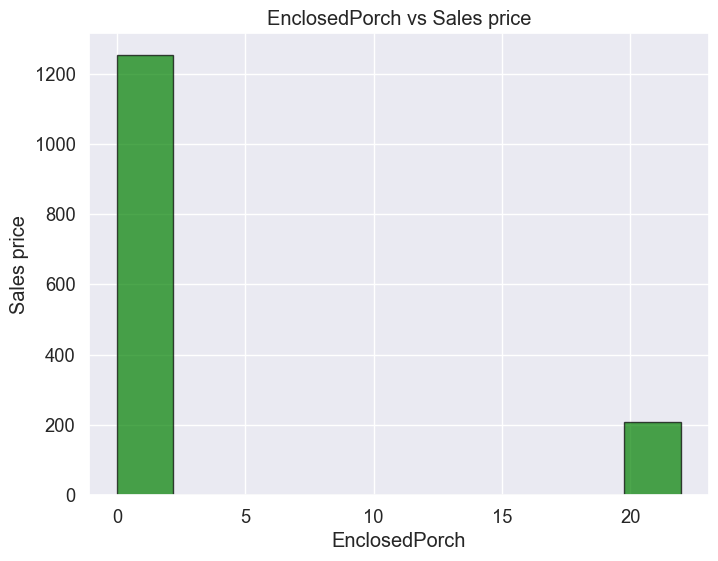

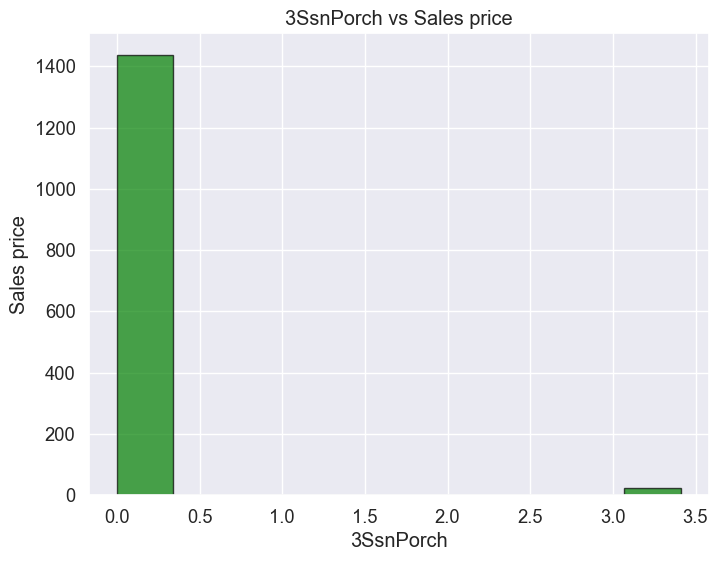

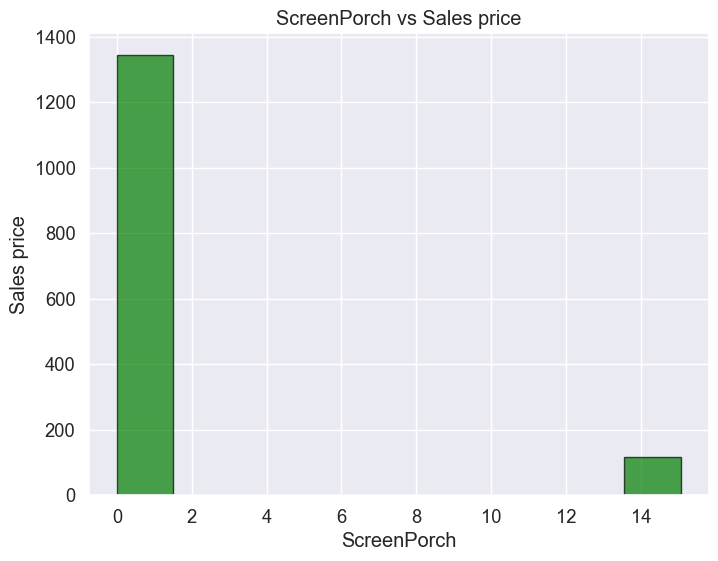

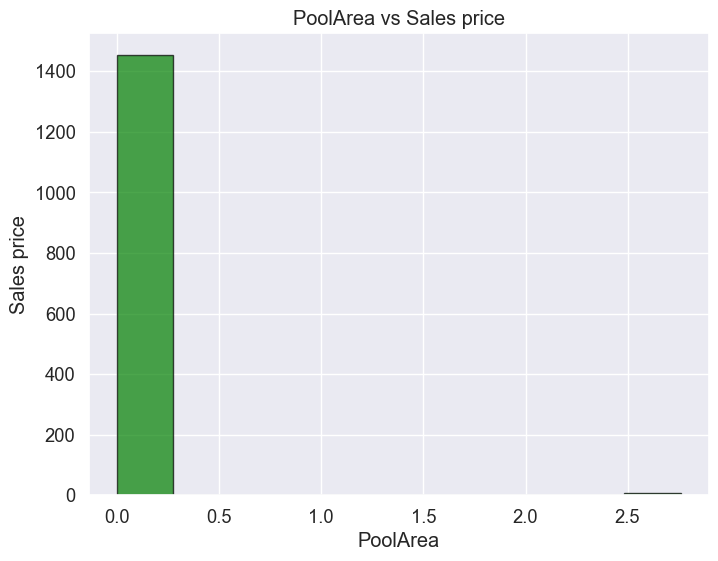

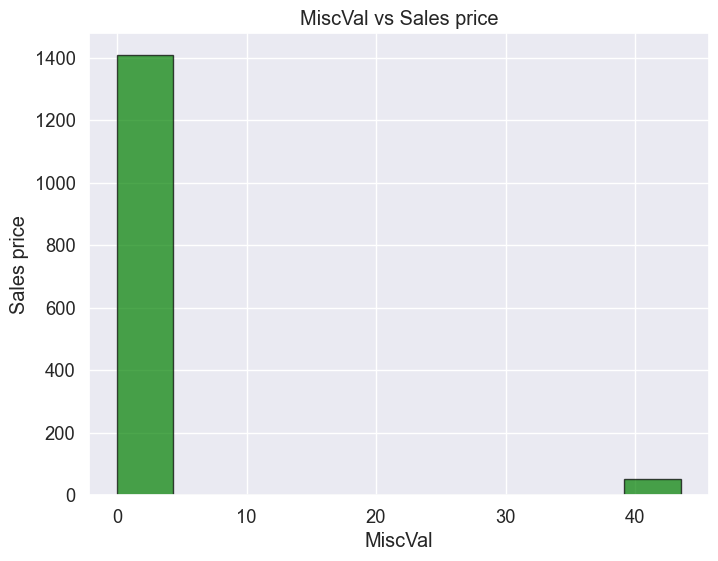

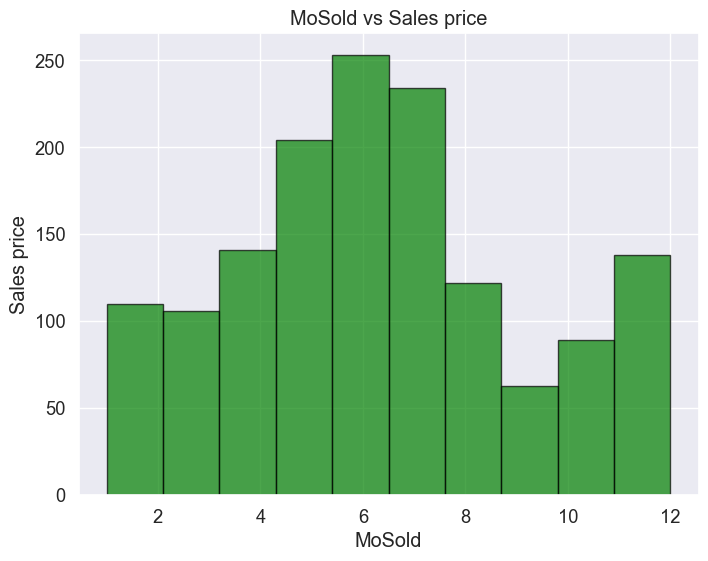

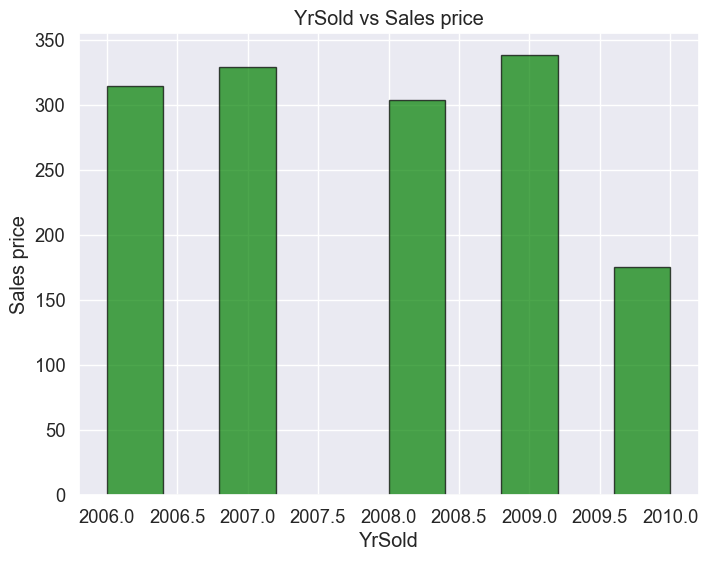

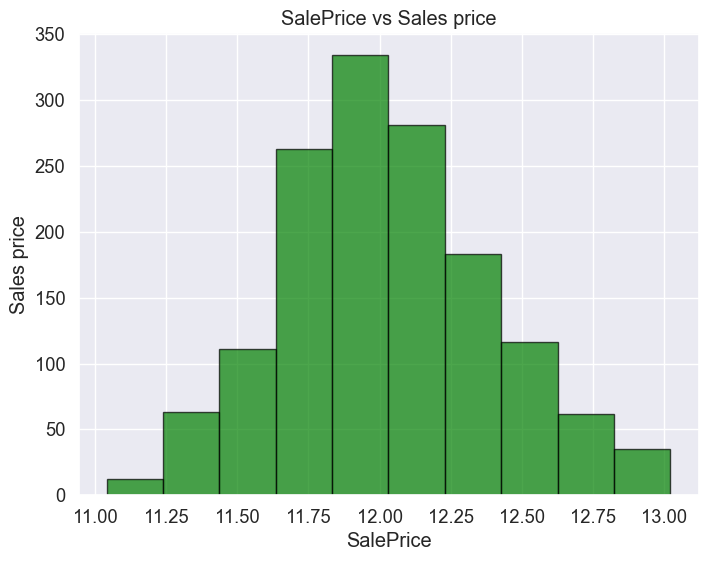

In [30]:
for column in num_cols:  # Exclude the last column (dependent variable)
    plt.figure(figsize=(8, 6))
    plt.hist(house_data_train[column], bins=10,edgecolor='black' ,color='green', alpha=0.7)
    plt.title(f'{column} vs Sales price')
    plt.xlabel(column)
    plt.ylabel('Sales price')
    plt.show()

# FEATURE SELECTION AND FEATURE ENCODING

In [31]:
''''use the sickit labraries of proeprocessing tecniques for encoding the categorical data


if we use the hot encoder then,
house_data_train = pd.get_dummies(house_data_train, columns=cat_cols)
'''
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
def encodinbg_the_categorical(dataframe,colum):
    df = dataframe.copy()

    for index in colum:
        df[index] = label_encoder.fit_transform(df[index])
    return df
                                                
house_data_train=encodinbg_the_categorical(house_data_train,cat_cols)                                                

In [32]:
house_data_train


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60.0,3,65.0,8450.0,1,3,3,0,4,...,0.00000,0.0,0.0,0.0,0.000000,2,2008,8,4,12.247699
1,2,20.0,3,80.0,9600.0,1,3,3,0,2,...,0.00000,0.0,0.0,0.0,0.000000,5,2007,8,4,12.109016
2,3,60.0,3,68.0,11250.0,1,0,3,0,4,...,0.00000,0.0,0.0,0.0,0.000000,9,2008,8,4,12.317171
3,4,70.0,3,60.0,9550.0,1,0,3,0,0,...,21.95411,0.0,0.0,0.0,0.000000,2,2006,8,0,11.849405
4,5,60.0,3,84.0,14260.0,1,0,3,0,2,...,0.00000,0.0,0.0,0.0,0.000000,12,2008,8,4,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60.0,3,62.0,7917.0,1,3,3,0,4,...,0.00000,0.0,0.0,0.0,0.000000,8,2007,8,4,12.072547
1456,1457,20.0,3,85.0,13175.0,1,3,3,0,4,...,0.00000,0.0,0.0,0.0,0.000000,2,2010,8,4,12.254868
1457,1458,70.0,3,66.0,9042.0,1,3,3,0,4,...,0.00000,0.0,0.0,0.0,43.489041,5,2010,8,4,12.493133
1458,1459,20.0,3,68.0,9717.0,1,3,3,0,4,...,21.95411,0.0,0.0,0.0,0.000000,4,2010,8,4,11.864469


In [33]:
for index in house_data_train.columns:
    print(index,"  : ",house_data_train[index].nunique())

Id   :  1460
MSSubClass   :  13
MSZoning   :  5
LotFrontage   :  77
LotArea   :  1006
Street   :  2
LotShape   :  4
LandContour   :  4
Utilities   :  2
LotConfig   :  5
LandSlope   :  3
Neighborhood   :  25
Condition1   :  9
Condition2   :  8
BldgType   :  5
HouseStyle   :  8
OverallQual   :  10
OverallCond   :  5
YearBuilt   :  109
YearRemodAdd   :  61
RoofStyle   :  6
RoofMatl   :  8
Exterior1st   :  15
Exterior2nd   :  16
MasVnrType   :  4
MasVnrArea   :  245
ExterQual   :  4
ExterCond   :  5
Foundation   :  6
BsmtQual   :  4
BsmtCond   :  4
BsmtExposure   :  4
BsmtFinType1   :  6
BsmtFinSF1   :  631
BsmtFinType2   :  6
BsmtFinSF2   :  2
BsmtUnfSF   :  755
TotalBsmtSF   :  698
Heating   :  6
HeatingQC   :  5
CentralAir   :  2
Electrical   :  5
1stFlrSF   :  734
2ndFlrSF   :  416
LowQualFinSF   :  2
GrLivArea   :  832
BsmtFullBath   :  4
BsmtHalfBath   :  2
FullBath   :  4
HalfBath   :  3
BedroomAbvGr   :  5
KitchenAbvGr   :  2
KitchenQual   :  4
TotRmsAbvGrd   :  10
Functional   :  

In [34]:
house_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int32  
 16  OverallQual    1460 non-null   float64
 17  OverallCond    1460 non-null   float64
 18  YearBuil

In [35]:
Y=house_data_train['SalePrice']
house_data_train.drop('SalePrice',axis=1,inplace=True)


In [36]:
Y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

# WRAPPER: FORWARD METHOD FOR FEATURE Selection

In [37]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=3)  # Adjust parameters as needed

sfs = SequentialFeatureSelector(knn_reg, k_features=20, forward=True, floating=False,
                                scoring='neg_mean_squared_error', cv=5)
sfs.fit(house_data_train, Y)

SequentialFeatureSelector(estimator=KNeighborsRegressor(n_neighbors=3),
                          k_features=(20, 20),
                          scoring='neg_mean_squared_error')

In [38]:
selected_feature_names = sfs.k_feature_names_
selected_feature_names
# pd.DataFrame.from_dict(sfs.get_metric_dict()).T

('MSZoning',
 'Street',
 'Utilities',
 'Neighborhood',
 'Condition2',
 'BldgType',
 'OverallQual',
 'OverallCond',
 'ExterQual',
 'Heating',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageFinish',
 'GarageCars',
 'PoolArea')

In [39]:
selected_feature_names = list(selected_feature_names)#feature in tuple so convert into list
X = house_data_train[selected_feature_names]

# Display the first few rows of the new DataFrame
X.head()

,MSZoning,Street,Utilities,Neighborhood,Condition2,BldgType,OverallQual,OverallCond,ExterQual,Heating,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,PoolArea
0,3,1,0,5,2,0,7.0,5.000000,2,1,1.0,2,1,1.0,2,8.0,0.0,1,2.0,0.0
1,3,1,0,24,2,0,6.0,5.575342,3,1,0.0,2,0,1.0,3,6.0,1.0,1,2.0,0.0
2,3,1,0,5,2,0,7.0,5.000000,2,1,1.0,2,1,1.0,2,6.0,1.0,1,2.0,0.0
3,3,1,0,6,2,0,7.0,5.000000,3,1,1.0,1,0,1.0,2,7.0,1.0,2,3.0,0.0
4,3,1,0,15,2,0,8.0,5.000000,2,1,1.0,2,1,1.0,2,9.0,1.0,1,3.0,0.0


# SIMPLE NN

In [40]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Split the data into training and testing sets
X_train,X_test, Y_train,Y_test  = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Sequential model
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=128, activation='relu', input_dim=20))

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='linear'))  # For a single-target regression
 
# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')  # Use mean squared error for regression

# Train the model
model.fit(X_train, Y_train, epochs=200, batch_size=32)#, validation_data=(X_val, y_val))

# Evaluate the model on test data
Y_pred = model.predict(X_test)

# Calculate Mean Squared Error on test data
mse = mean_squared_error(Y_test,Y_pred)
print(f'Mean Squared Error on Test Data: {mse}')


Epoch 1/200
37/37 [==============================] - 1s 2ms/step - loss: 33.0830
Epoch 2/200
37/37 [==============================] - 0s 1ms/step - loss: 1.0522
Epoch 3/200
37/37 [==============================] - 0s 1ms/step - loss: 0.5748
Epoch 4/200
37/37 [==============================] - 0s 1ms/step - loss: 0.4709
Epoch 5/200
37/37 [==============================] - 0s 3ms/step - loss: 0.4171
Epoch 6/200
37/37 [==============================] - 0s 1ms/step - loss: 0.4062
Epoch 7/200
37/37 [==============================] - 0s 1ms/step - loss: 0.3659
Epoch 8/200
37/37 [==============================] - 0s 1ms/step - loss: 0.3484
Epoch 9/200
37/37 [==============================] - 0s 1ms/step - loss: 0.3343
Epoch 10/200
37/37 [==============================] - 0s 1ms/step - loss: 0.3176
Epoch 11/200
37/37 [==============================] - 0s 2ms/step - loss: 0.3054
Epoch 12/200
37/37 [==============================] - 0s 1ms/step - loss: 0.3152
Epoch 13/200
37/37 [================